## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count


1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df 


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

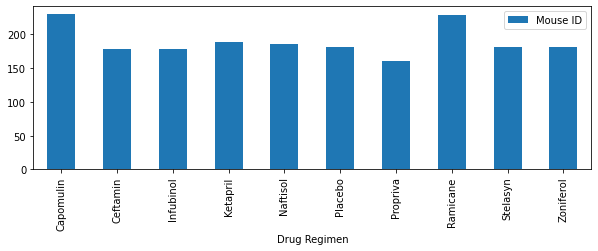

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")  
drugs_df.plot(kind="bar", figsize=(10,3))



In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

<AxesSubplot:ylabel='Sex'>

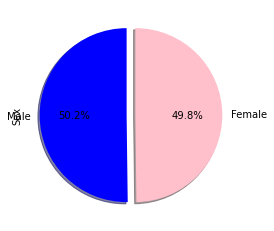

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count=clean_df["Sex"].value_counts()
labels=mf_count.values
sizes=mf_count.values
colors=["blue", "pink"]
explode=[0.1,0]
mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x7f82867cbc70>,
 [Text(-1.1999761226567098, -0.007570010156471555, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.6999860715497472, -0.0044158392579417395, '50.2%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.8%')])

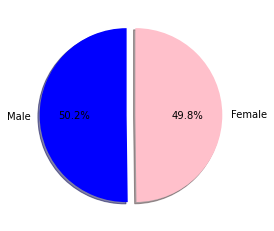

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mf_count=clean_df["Sex"].value_counts()
labels=mf_count.index
sizes=mf_count.values
colors=["blue", "pink"]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]
#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
    
# add subset 
    
# Determine outliers using upper and lower bounds

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


FileNotFoundError: [Errno 2] No such file or directory: '../Images/box_plot.png'

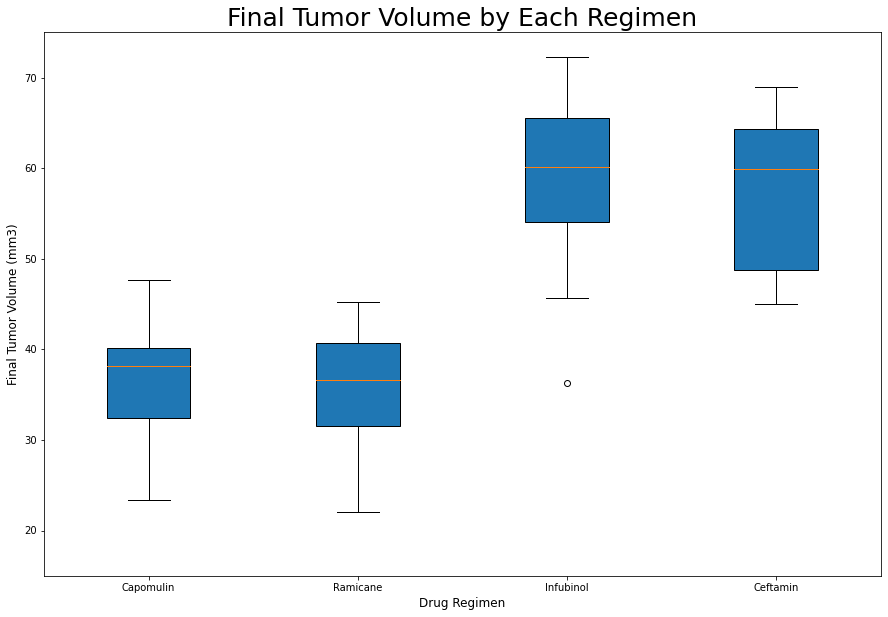

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumor Volume by Each Regimen',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(15, 75)
plt.savefig("../Images/box_plot.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

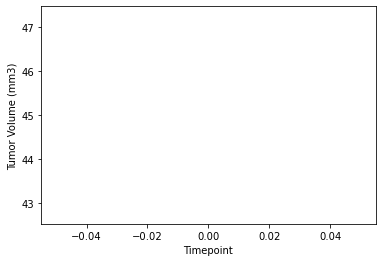

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

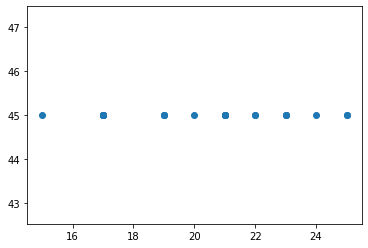

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.show()

## Correlation and Regression

In [1]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


NameError: name 'st' is not defined